# PARKINSON DISEASE PREDICTION MODEL

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Model Building</a></li>
<li><a href="#communication">Communication</a></li>
</ul>

<a id='intro'></a>
# Introduction

Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves. Symptoms start slowly. The first symptom may be a barely noticeable tremor in just one hand. Tremors are common, but the disorder may also cause stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.
Although Parkinson's disease can't be cured, medications might significantly improve your symptoms. Occasionally, your health care provider may suggest surgery to regulate certain regions of your brain and improve your symptoms.

#### Project Purpose
Sometimes it takes time to diagnose Parkinson's disease. Diagnosis of Parkinson's disease (PD) is commonly based on medical observations and assessment of clinical signs, including the characterization of a variety of motor symptoms. However, traditional diagnostic approaches may suffer from subjectivity as they rely on the evaluation of movements that are sometimes subtle to human eyes and therefore difficult to classify, leading to possible misclassification. In the meantime, early non-motor symptoms of PD may be mild and can be caused by many other conditions. Therefore, these symptoms are often overlooked, making diagnosis of PD at an early stage challenging.

The purpose of this project is to create a model that will help predict the status of a patient at an early stage using past data.

#### Data Source
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in Cerrahpasa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physician's examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

<a id='wrangling'></a>
# Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv("pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
df.shape

(756, 755)

In [4]:
df.isnull().any().sum()

0

In [5]:
df.duplicated().sum()

1

In [6]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


<a id='eda'></a>
# Exploratory Data Analysis

In [13]:
df["class"].groupby(df["gender"]).value_counts()

gender  class
0       1        242
        0        123
1       1        321
        0         69
Name: class, dtype: int64

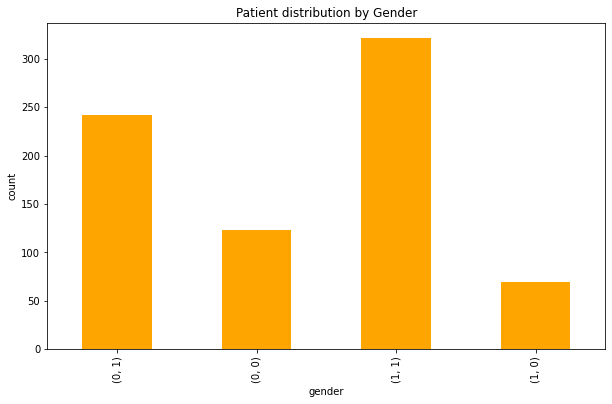

In [11]:
#plotting a barchart to show the distribution
plt.figure(figsize=(10,6))
df["class"].groupby(df["gender"]).value_counts().plot.bar(color="orange")
plt.ylabel("count")
plt.xlabel("gender/class")
plt.title("Patient distribution by Gender");

Assuming in the gender column 0 represent female and 1 represent male. Also, in the class column 0 being negative and 1 being positive.
We have more more men being diagnosed with parkinson disease.

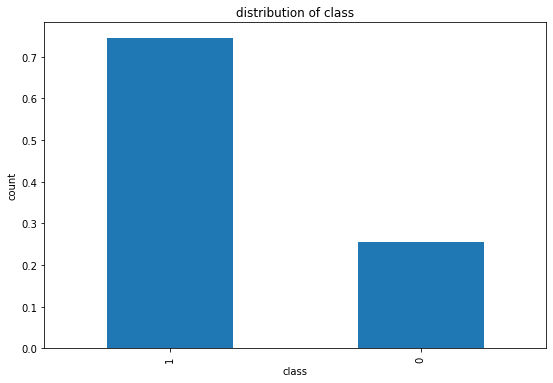

In [30]:
df["class"].value_counts(normalize=True).plot.bar(figsize=(9,6))
plt.xlabel("class")
plt.ylabel("count")
plt.title("distribution of class");

This shows that the target column "class" is not balanced. Hence, there is need for oversampling of the data.

Due to absence of a data dictionary to help understand each column, exploration of data is hence limited.

In [33]:
# drop unnecessary columns
df.drop("id", axis=1, inplace=True)

## Split

In [35]:
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(604, 753) (604,) (151, 753) (151,)


<a id='model'></a>
# MODEL

### Baseline

In [106]:
# baseline
baseline_accuracy = df["class"].value_counts(normalize=True).max()
baseline_accuracy

0.7456953642384105

This is the baseline accuracy score and it means our model has to perform better than this score.

### Iterate

I decided to train more than one model to get the model with the best accuracy score.

### Logistic Regression model

In [75]:
log = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   LogisticRegression(max_iter=1000))
log.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [76]:
metrics.accuracy_score(y_train, log.predict(X_train))

1.0

In [77]:
log.score(X_test, y_test)

0.8145695364238411

In [83]:
print(metrics.confusion_matrix(y_test, log.predict(X_test)))
print("\n")
print(metrics.classification_report(y_test, log.predict(X_test)))

[[30 15]
 [13 93]]


              precision    recall  f1-score   support

           0       0.70      0.67      0.68        45
           1       0.86      0.88      0.87       106

    accuracy                           0.81       151
   macro avg       0.78      0.77      0.78       151
weighted avg       0.81      0.81      0.81       151



### K-Neighbors Classifier

In [64]:
knn = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   KNeighborsClassifier(n_neighbors=1))
knn.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [65]:
knn.score(X_train, y_train)

1.0

In [66]:
knn.score(X_test, y_test)

0.8675496688741722

##### Hyperparameter tuning to get the best k value

In [99]:
# hyperparameter tuning
error_rate = []
for k in range(1,11):
    knn = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

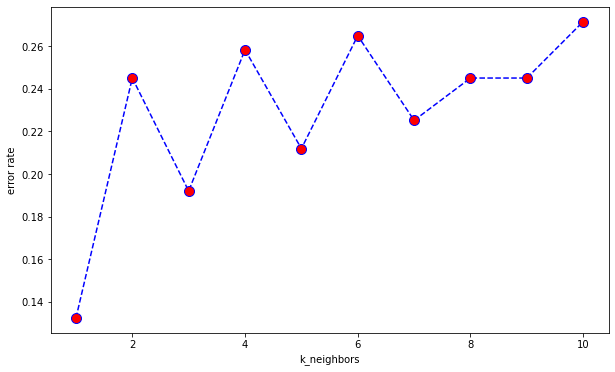

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, color="blue", linestyle="--", marker="o", markerfacecolor= "red", markersize=10)
plt.xlabel("k_neighbors")
plt.ylabel("error rate");

We can see that error_rate is lowest when k = 1

In [82]:
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))
print("\n")
print(metrics.classification_report(y_test, knn.predict(X_test)))

[[42  3]
 [43 63]]


              precision    recall  f1-score   support

           0       0.49      0.93      0.65        45
           1       0.95      0.59      0.73       106

    accuracy                           0.70       151
   macro avg       0.72      0.76      0.69       151
weighted avg       0.82      0.70      0.71       151



### Decision Tree Classifier

In [70]:
dec_tree = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   DecisionTreeClassifier(random_state=42))
dec_tree.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [71]:
dec_tree.score(X_train, y_train)

1.0

In [72]:
dec_tree.score(X_test, y_test)

0.8013245033112583

##### Hyperparameter tuning to get the best max_depth

In [92]:
error = []
for i in range(2,20,2):
    dec_tree = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   DecisionTreeClassifier(max_depth=i, random_state=42))
    dec_tree.fit(X_train, y_train)
    error.append(np.mean(dec_tree.predict(X_test) != y_test))

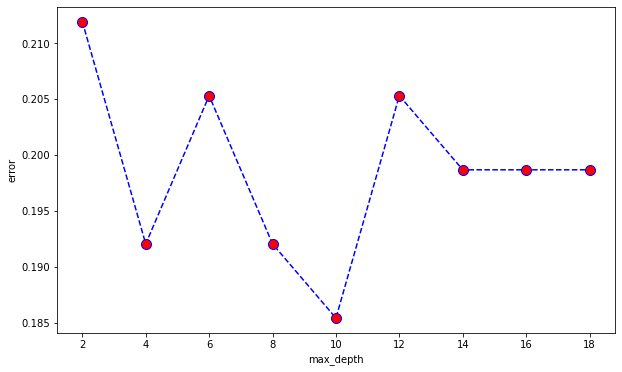

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20,2), error, color="blue", linestyle="--", marker="o", markerfacecolor= "red", markersize=10)
plt.xlabel("max_depth")
plt.ylabel("error");

We can see that when the error rate was at minimum when max_dept = 10.

In [87]:
final_dec_tree = make_pipeline(SMOTE(random_state=42),
                   StandardScaler(),
                   DecisionTreeClassifier(max_depth=10, random_state=42))
final_dec_tree.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [88]:
final_dec_tree.score(X_test, y_test)

0.8145695364238411

In [95]:
print(metrics.confusion_matrix(y_test, final_dec_tree.predict(X_test)))
print("\n")
print(metrics.classification_report(y_test, final_dec_tree.predict(X_test)))

[[28 17]
 [11 95]]


              precision    recall  f1-score   support

           0       0.72      0.62      0.67        45
           1       0.85      0.90      0.87       106

    accuracy                           0.81       151
   macro avg       0.78      0.76      0.77       151
weighted avg       0.81      0.81      0.81       151



<a id='conclusions'></a>
# Communication 

### Conclusion
All the models performed well and also had a good accuracy score greater than the baseline. Regardless of this, there is still the need to choose one model as the main model for future prediction and this is where certain factors come to play.

Due to the domain in which this model will be utilized, i.e healthcare, there is need for us to err on the side of caution such that false postive results are more welcomed than false negative results(type 1 error). Hence we need a model that has a better precision than recall.

With this reason the model from the DecisionTreeClassifier(final_dec_tree) is the right model.

### Limitation
The dataset was quite small limiting the training of our model. Also, I had to come up with assumptions of what 0s and 1s meant in both gender and class column.